In [1]:
!pip install mediapipe opencv-python

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement mediapipe (from versions: none)
ERROR: No matching distribution found for mediapipe


In [ ]:
!pip install --upgrade pip --user

In [ ]:
#libraries for pose recognition
import cv2
import mediapipe as mp
import numpy as np
#library to plot statistics
import matplotlib.pyplot as plt
import time
#libraries for speech recognition
import pyttsx3
import datetime
import speech_recognition as sr
import wikipedia
import webbrowser
import os
import random
import smtplib
import time
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
#importing and setting voice for assistant
engine=pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty('voice',voices[0].id)

In [5]:
#defining all functions

def take():
    #takes microphone input and returns string output
    r=sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening...")
        r.pause_threshold = 1
        audio = r.listen(source)
    
    try:
        print("Recognizing...")
        query = r.recognize_google(audio, language = 'en-in')
        print("User said: ",query,end="\n")
        
    except Exception:
        #print(e) removed to not show error
        print("Say that again?")
        return "None"
    return query

def speak(audio):
    engine.say(audio)
    engine.runAndWait()
    pass

def wishMe():
    hour = int(datetime.datetime.now().hour)
    if hour>=0 and hour<12:
        speak("Good morning!")
    elif hour>=12 and hour<18:
        speak("Good afternoon!")
    else:
        speak("Good evening!")
    speak("I am Chris, your personal gym trainer. How may I help you today?")


In [6]:
#Calculating angle for the workout between the above 3 points
def calculate_angle(a,b,c):
    a = np.array(a) #First
    b = np.array(b) #Mid
    c = np.array(c) #End
    
    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle>180.0:
        angle = 360-angle
    
    return angle

In [7]:
def leftbicep():
    #Building the left bicep curl counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
        
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
      
            # Make detection
            results = pose.process(image)
    
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
            
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                # Calculate angle
                angle_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
            
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                           tuple(np.multiply(elbow_left, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                #Curl counter logic
                if angle_left > 160:
                    stage = "down"
                if angle_left < 30 and stage == 'down':
                    stage = 'up'
                    counter+=1
                       
            except:
                pass
        
            #Render curl counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
        
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

            cv2.imshow('Left Bicep Curl', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of the left bicep curl")
        return counter

In [8]:
def squat():
     #Building the full squat counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
        
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
      
            # Make detection
            results = pose.process(image)
    
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
            
                # Get coordinates
                hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

                # Calculate angle
                angle_left = calculate_angle(hip_left, knee_left, ankle_left)
                angle_right = calculate_angle(hip_right, knee_right, ankle_right)
            
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                           tuple(np.multiply(knee_left, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                cv2.putText(image, str(angle_right), 
                           tuple(np.multiply(knee_right, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                #Squat counter logic
                if angle_left > 165 and angle_right > 165:
                    stage = 'up'
                if angle_left <= 100 and angle_right<=100 and stage == 'up':
                    stage = "down"
                    counter+=1
#                     speak(str(counter))
                       
            except:
                pass
        
            #Render squat counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
        
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
            cv2.imshow('Squats', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your squat.")
        return counter

In [9]:
def fullbicep():
    #Building the full bicep curl counter
    #Determining joints
    cap = cv2.VideoCapture(0)

    #Counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
        
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
      
            # Make detection
            results = pose.process(image)
    
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
            
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                # Calculate angle
                angle_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
                angle_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
            
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                           tuple(np.multiply(elbow_left, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                cv2.putText(image, str(angle_right), 
                           tuple(np.multiply(elbow_right, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                #Curl counter logic
                if angle_left > 160 and angle_right>160:
                    stage = "down"
                if angle_left < 30 and angle_right < 30 and stage == 'down':
                    stage = 'up'
                    counter+=1
                    
                       
            except:
                pass
        
            #Render curl counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
        
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
            cv2.imshow('Full Bicep Curl', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your full bicep curl.")
        return counter

In [10]:
def rightbicep():
    #Building the right bicep curl counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
                # Calculate angle
                angle_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
                
                # Visualize angle
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(elbow_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Curl counter logic
                if angle_right > 160:
                    stage = "down"
                if angle_right < 30 and stage == 'down':
                    stage = 'up'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render curl counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Right Bicep Curl', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Right Bicep Curl.")
        return counter

In [11]:
def abcrunch():
    #Building the lower abdomen crunch counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

                # Calculate angle
                angle_left = calculate_angle(shoulder_left, hip_left, knee_left)
                angle_right = calculate_angle(shoulder_right, hip_right, knee_right)
                
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                            tuple(np.multiply(hip_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(hip_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Curl counter logic
                if angle_left > 170 and angle_right>170:
                    stage = "down"
                if angle_left < 80 and angle_right < 80 and stage == 'down':
                    stage = 'up'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render crunch counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Lower Abdomen Crunch', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Lower Abdomen Crunch.")
        return counter

In [12]:
def lunge():

    #Building the Lunge counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

                # Calculate angle
                angle_left = calculate_angle(shoulder_left, knee_left, ankle_left)
                angle_right = calculate_angle(shoulder_right, hip_right, knee_right)
                
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                            tuple(np.multiply(knee_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(hip_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Lunge counter logic
                if angle_left >165 or angle_right>165 :
                    stage = "up"
                if angle_left < 150 and angle_right <150 and stage == 'up':
                    stage = 'down'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render lunge counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Lunges', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Lunges.")
        return counter

In [13]:
def pushup():

    #Building the Push Ups counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                # Calculate angle
                angle_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
                angle_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
                
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                            tuple(np.multiply(elbow_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(elbow_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Push Up counter logic
                if angle_left >165 or angle_right>165 :
                    stage = "up"
                if angle_left <= 90 and angle_right <=90 and stage == 'up':
                    stage = 'down'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render push up counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Push Ups', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Push Ups.")
        return counter

In [14]:
def jumpingjacks():

    #Building the Jumping Jacks counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            
                # Calculate angle
                angle_left = calculate_angle(hip_right, hip_left, knee_left)
                angle_right = calculate_angle(hip_left, hip_right, knee_right)
                
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                            tuple(np.multiply(hip_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(hip_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Jumping Jack counter logic
                if angle_left <=92 and angle_right<=92 :
                    stage = "in"
                if angle_left >= 100 and angle_right >=100 and stage == 'in':
                    stage = 'out'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render push up counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Jumping Jacks', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Jumping Jacks.")
        return counter

In [15]:
def highknees():
    #Building the High Knees counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                

                # Calculate angle
                angle_left = calculate_angle(shoulder_left,hip_left, knee_left)
                angle_right = calculate_angle(shoulder_right,hip_right,knee_right )
                
                # Visualize angle
                cv2.putText(image, str(angle_left), 
                            tuple(np.multiply(hip_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right), 
                            tuple(np.multiply(hip_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #High Knees counter logic
                if angle_left <95 :
                    stage = "left"
                if angle_right <95 and stage == 'left':
                    stage = 'right'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render squat counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('High Knees', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your High Knees.")
        return counter

In [16]:
def mountainclimb():
    #Building the Mountain Climbers counter

    #Determining joints
    cap = cv2.VideoCapture(0)

    #Curl counter variables
    counter=0
    stage = None


    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                
                # Get coordinates
                shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
                knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
                ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

                # Calculate angle
                angle_left_upper = calculate_angle(elbow_left,shoulder_left,hip_left)
                angle_right_upper = calculate_angle(elbow_right,shoulder_right,hip_right )
                angle_left_lower = calculate_angle(hip_left, knee_left,ankle_left)
                angle_right_lower = calculate_angle(hip_right,knee_right, ankle_right )
                
                # Visualize angle
                cv2.putText(image, str(angle_left_lower), 
                            tuple(np.multiply(knee_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right_lower), 
                            tuple(np.multiply(knee_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_left_upper), 
                            tuple(np.multiply(shoulder_left, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                cv2.putText(image, str(angle_right_upper), 
                            tuple(np.multiply(shoulder_right, [640, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                #Mountain Climbers counter logic
                if angle_left_lower <110 and angle_right_lower>=150:
                    stage = "left"
                if angle_right_lower <110 and angle_left_lower>=150 and stage == 'left':
                    stage = 'right'
                    counter+=1
                    
                        
            except:
                pass
            
            #Render squat counter
            #Setup status box
            cv2.rectangle(image,(0,0),(225,73),(245,117,16), -1)
            
            #Rep data
            cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
            #Stage data
            cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image,stage,(60,60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Mountain Climbers', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        speak("Good job! You completed "+str(counter)+" reps of your Mountain Climbers.")
        return counter

Listening...
Recognizing...
User said:  Chris can you play me the left bicep workout
Listening...
Recognizing...
User said:  can you play me the sports workout
Listening...
Recognizing...
User said:  can you play me the squats workout
Listening...
Recognizing...
User said:  quit
Left Bicep Curl : 4reps
Squats : 2reps


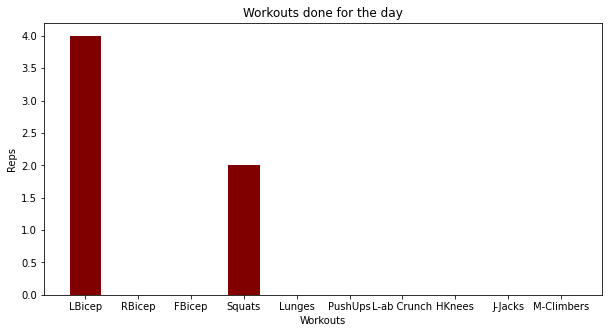

In [24]:
import matplotlib.pyplot as plt
#Driver code
lbicep = 0
rbicep = 0
fbicep = 0
squats = 0
ab = 0
mc = 0
hk = 0
push = 0
l = 0
jj = 0
if __name__ == '__main__': 
    wishMe()
    while True:
        query = take().lower()
        #logic for executing tasks based on query
        if 'squat' in query or 'squats' in query:
            speak("You chose the Squat workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            squats = squat()
        
        elif 'full bicep' in query:
            speak("You chose the Full Bicep Curl workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            fbicep = fullbicep()

        elif 'left bicep' in query:
            speak("You chose the Left Bicep Curl workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            lbicep = leftbicep()

        elif 'right bicep' in query:
            speak("You chose the Right Bicep Curl workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            rbicep = rightbicep()

        elif 'crunch' in query or 'crunches' in query:
            speak("You chose the Lower Abdomen Crunch workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            ab = abcrunch()

        elif 'lunge' in query or 'lunges' in query:
            speak("You chose the Lunge workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            l = lunge()
        
        elif 'push up' in query or 'push ups' in query:
            speak("You chose the Push Up workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            push = pushup()
        
        elif 'jumping jacks' in query:
            speak("You chose the Jumping Jacks workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            jj = jumpingjacks()
            
        elif 'high knees' in query:
            speak("You chose the High Knees workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            hk = highknees()
        
        elif 'mountain climbers' in query:
            speak("You chose the Mountain Climbers workout! Starting up your space...Workout starts in 5 seconds")
            time.sleep(3)
            mc = mountainclimb()
        
        elif 'the time' in query:
            strTime = datetime.datetime.now().strftime("%H:%M:%S")
            speak(f"The time is {strTime}")
        
        elif 'quit' in query: 
            speak("Congratulations for your efforts today!")
            speak("Here are the statistics for today's workout :")
            if(fbicep>0):
                speak("Full Bicep Curl : "+str(fbicep)+"reps")
                print("Full Bicep Curl : "+str(fbicep)+"reps")
            if(rbicep>0):
                speak("Right Bicep Curl : "+str(rbicep)+"reps")
                print("Right Bicep Curl : "+str(rbicep)+"reps")
            if(lbicep>0):
                speak("Left Bicep Curl : "+str(lbicep)+"reps")
                print("Left Bicep Curl : "+str(lbicep)+"reps")
            if(ab>0):
                speak("Lower Abdomen Crunch : "+str(ab)+"reps")
                print("Lower Abdomen Crunch : "+str(ab)+"reps")
            if(push>0):
                speak("Push Ups : "+str(push)+"reps")
                print("Push Ups : "+str(push)+"reps")
            if(hk>0):
                speak("High Knees : "+str(hk)+"reps")
                print("High Knees : "+str(hk)+"reps")
            if(mc>0):
                speak("Mountain Climbers : "+str(mc)+"reps")
                print("Mountain Climbers : "+str(mc)+"reps")
            if(l>0):
                speak("Lunges : "+str(l)+"reps")
                print("Lunges : "+str(l)+"reps")
            if(squats>0):
                speak("Squats : "+str(squats)+"reps")
                print("Squats : "+str(squats)+"reps")
            if(jj>0):
                speak("Jumping Jacks : "+str(jj)+"reps")
                print("Jumping Jacks : "+str(jj)+"reps")
            #Creating a bar plot for the statistics
            workouts = list(["LBicep","RBicep","FBicep","Squats","Lunges","PushUps","L-ab Crunch","HKnees","J-Jacks","M-Climbers"])
            counts = [lbicep,rbicep,fbicep,squats,l,push,ab,hk,jj,mc]
            fig = plt.figure(figsize = (10, 5))
 
            # creating the bar plot
            plt.bar(workouts, counts, color ='maroon', width = 0.6)
            plt.xlabel("Workouts")
            plt.ylabel("Reps")
            plt.title("Workouts done for the day")
            # Time stamp with date and time
            time.strftime("%Y-%m-%d %H%M%S")
            # save plot
            plt.savefig("Figure "+ time.strftime("%Y-%m-%d %H%M%S") + ".png",bbox_inches = 'tight',facecolor='white')
            plt.show()
            speak("Quitting Chris. Have a good day")
            break